<a href="https://colab.research.google.com/github/Prernatripathi7/24095082-CSOC-IG/blob/main/Week%200/Week_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Loss = 56005651761.9464
Iteration 10: Loss = 38465933627.9261
Iteration 20: Loss = 27080979033.8867
Iteration 30: Loss = 19641793916.5395
Iteration 40: Loss = 14755759367.7536
Iteration 50: Loss = 11532553897.7883
Iteration 60: Loss = 9397845078.4467
Iteration 70: Loss = 7978659450.9422
Iteration 80: Loss = 7031493006.5673
Iteration 90: Loss = 6396670205.2333
Iteration 100: Loss = 5969101390.7888
Iteration 110: Loss = 5679408510.2395
Iteration 120: Loss = 5481668616.9466
Iteration 130: Loss = 5345414361.0084
Iteration 140: Loss = 5250390792.9508
Iteration 150: Loss = 5183106630.7506
Iteration 160: Loss = 5134559157.8064
Iteration 170: Loss = 5098729650.1778
Iteration 180: Loss = 5071586296.2442
Iteration 190: Loss = 5050422253.2534
Iteration 200: Loss = 5033415512.5405
Iteration 210: Loss = 5019335842.3656
Iteration 220: Loss = 5007349410.9959
Iteration 230: Loss = 4996888372.9551
Iteration 240: Loss = 4987563712.6916
Iteration 250: Loss = 4979106924.6525
Iteration 260: Lo

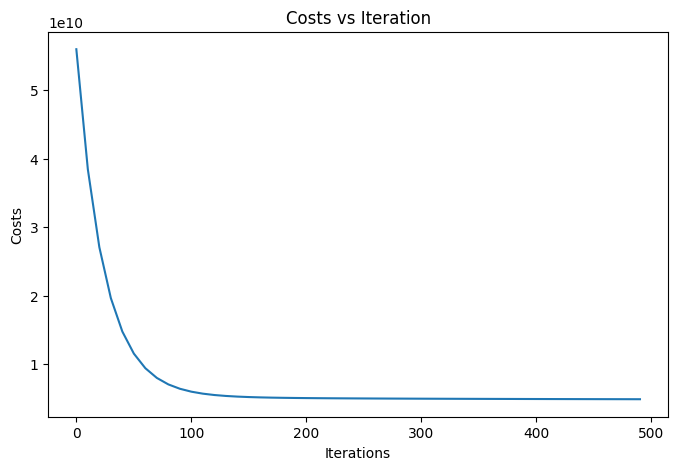

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time
df= pd.read_csv("housing.csv")
df=df.dropna(axis=0)
y=df.median_house_value.values.reshape(-1, 1)
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
x=df[features]
x=pd.get_dummies(x,drop_first=True)
x = pd.get_dummies(x, drop_first=True)
x = x.astype(float).values
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(x, y, test_size=0.2, random_state = 0)
trainy = trainy.reshape(-1, 1)
valy = valy.reshape(-1, 1)
mean= trainx.mean(axis=0)
std= trainx.std(axis=0)
trainx_norm = (trainx - mean) / std
valx_norm = (valx - mean) / std
m_train = trainx_norm.shape[0]
m_val = valx_norm.shape[0]
trainx_norm = np.hstack((np.ones((m_train, 1)), trainx_norm))
valx_norm = np.hstack((np.ones((m_val, 1)), valx_norm))
weights = np.zeros((trainx_norm.shape[1], 1))
learning_rate = 0.01
epochs = 500
m = m_train
costs=[]
start_time=time.time()
for iteration in range(epochs):
    y_pred = trainx_norm.dot(weights)
    error = y_pred - trainy
    gradients = (2/m) * (trainx_norm.T.dot(error))
    weights -= learning_rate * gradients
    if iteration % 10 == 0:
        loss = np.mean(error ** 2)
        print(f"Iteration {iteration}: Loss = {loss:.4f}")
        costs.append(loss)
end_time=time.time()
convergence_time=end_time-start_time
def predict(data_with_bias):
    preds = data_with_bias.dot(weights)
    return preds.flatten()
train_preds=predict(trainx_norm)
val_preds = predict(valx_norm)
for idx, pred in zip(valx_norm[:, 1:], val_preds):
    print(f"Prediction: {pred}")
mae_train = mean_absolute_error(trainy, train_preds)
rmse_train = np.sqrt(mean_squared_error(trainy, train_preds))
r2_train = r2_score(trainy, train_preds)
mae_val = mean_absolute_error(valy, val_preds)
rmse_val = np.sqrt(mean_squared_error(valy, val_preds))
r2_val = r2_score(valy, val_preds)
print(f"Training MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
print(f"Validation MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}")
print(f"Convergence time: {convergence_time:.4f} seconds")
iterations=list(range(0,500,10))
plt.figure(figsize=(8,5))
plt.plot(iterations,costs)
plt.title("Costs vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.savefig('covergence vs iteration1.png')
plt.show()

Iteration 0: Loss = 53911253165.051338
Iteration 10: Loss = 37239557404.035538
Iteration 20: Loss = 26330962627.240841
Iteration 30: Loss = 19161728261.132069
Iteration 40: Loss = 14435473758.249857
Iteration 50: Loss = 11311727187.367825
Iteration 60: Loss = 9242135852.727633
Iteration 70: Loss = 7867509915.532402
Iteration 80: Loss = 6951897788.260861
Iteration 90: Loss = 6339961088.293160
Iteration 100: Loss = 5929248524.055656
Iteration 110: Loss = 5652085774.739637
Iteration 120: Loss = 5463709533.055533
Iteration 130: Loss = 5334473886.459481
Iteration 140: Loss = 5244721355.194259
Iteration 150: Loss = 5181401999.920494
Iteration 160: Loss = 5135841691.816563
Iteration 170: Loss = 5102267137.912506
Iteration 180: Loss = 5076829984.004588
Iteration 190: Loss = 5056960478.329181
Iteration 200: Loss = 5040939003.733188
Iteration 210: Loss = 5027611787.029812
Iteration 220: Loss = 5016202108.654591
Iteration 230: Loss = 5006184825.017341
Iteration 240: Loss = 4997202899.037140
Itera

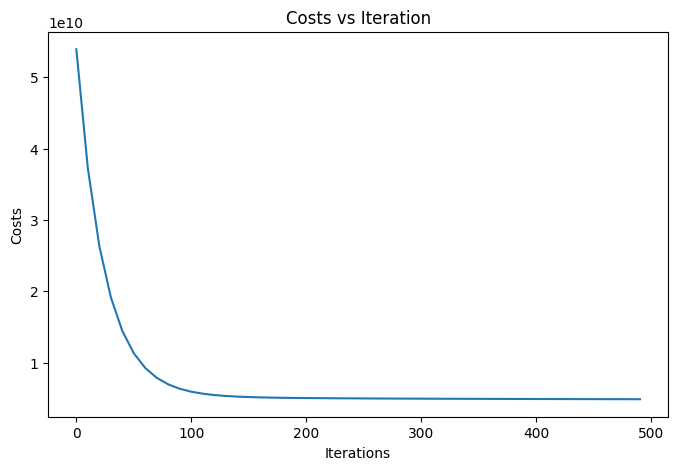

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time
df= pd.read_csv("housing.csv")
df=df.dropna(axis=0)
y=df.median_house_value
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
x=df[features]
x=pd.get_dummies(x,drop_first=True)
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(x, y,test_size=0.2, random_state = 0)
mean= trainx.mean()
std= trainx.std()
trainx_norm = (trainx - mean) / std
valx_norm = (valx - mean) / std
trainy_list = trainy.tolist()
valy_list = valy.tolist()
weights = [0.0] * (len(features) + 1)
learning_rate = 0.01
epochs = 500
costs=[]
m = len(trainx_norm)
start_time=time.time()
for iterations in range(epochs):
    gradient=[0.0]*len(weights)
    for i in range(m):
        x_i=[1.0]+trainx_norm.iloc[i].tolist()
        y_i=trainy_list[i]
        y_pred = sum(weights[j] * x_i[j] for j in range(len(weights)))
        error = y_pred - y_i
        for j in range(len(weights)):
            gradient[j] += (2/m) * error * x_i[j]
    for j in range(len(weights)):
        weights[j] -= learning_rate * gradient[j]
    if iterations % 10 == 0:
        loss = 0.0
        for i in range(m):
            x_i = [1.0] + trainx_norm.iloc[i].tolist()
            y_i = trainy_list[i]
            y_pred = sum(weights[j] * x_i[j] for j in range(len(weights)))
            loss += (y_pred - y_i) ** 2
        loss /= m
        costs.append(loss)
        print(f"Iteration {iterations}: Loss = {loss:.6f}")
end_time= time.time()
convergence_time=end_time-start_time
def predict(data_norm):
    predictions = []
    for i in range(len(data_norm)):
        x_i = [1.0] + data_norm.iloc[i].tolist()
        y_pred = sum(weights[j] * x_i[j] for j in range(len(weights)))
        predictions.append(y_pred)
    return predictions
train_preds = predict(trainx_norm)
val_preds = predict(valx_norm)
for i, pred in enumerate(val_preds):
    print(f"Prediction for sample {i}: {pred}")
mae_train = mean_absolute_error(trainy, train_preds)
rmse_train = np.sqrt(mean_squared_error(trainy, train_preds))
r2_train = r2_score(trainy, train_preds)
mae_val = mean_absolute_error(valy, val_preds)
rmse_val = np.sqrt(mean_squared_error(valy, val_preds))
r2_val = r2_score(valy, val_preds)
print(f"Training MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
print(f"Validation MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}")
iterations=list(range(0,500,10))
print(f"Convergence time: {convergence_time:.4f} seconds")
plt.figure(figsize=(8,5))
plt.plot(iterations,costs)
plt.title("Costs vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.savefig('covergence vs iteration.png')
plt.show()



In [19]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time
df= pd.read_csv("housing.csv")
df=df.dropna(axis=0)
y=df.median_house_value
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
x=df[features]
x=pd.get_dummies(x,drop_first=True)
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(x, y,test_size=0.2, random_state = 0)
mean= trainx.mean()
std= trainx.std()
trainx_norm = (trainx - mean) / std
valx_norm = (valx - mean) / std
from sklearn import linear_model
df_model = linear_model.LinearRegression()
start_time=time.time()
df_model.fit(trainx_norm, trainy)
end_time=time.time()
fitting_duration= end_time-start_time
train_preds=df_model.predict(trainx_norm)
val_preds = df_model.predict(valx_norm)
mae_train = mean_absolute_error(trainy, train_preds)
rmse_train = np.sqrt(mean_squared_error(trainy, train_preds))
r2_train = r2_score(trainy, train_preds)
mae_val = mean_absolute_error(valy, val_preds)
rmse_val = np.sqrt(mean_squared_error(valy, val_preds))
r2_val = r2_score(valy, val_preds)
print(val_preds)
print(f"Fitting duration: {fitting_duration:.4f} seconds")
print(f"Training MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
print(f"Validation MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}")



[189847.43191478 175807.01704452 123403.18401065 ... 155109.64616817
 217118.61734572 250189.80917343]
Fitting duration: 0.0100 seconds
Training MAE: 49752.9160, RMSE: 68758.3663, R2: 0.6448
Validation MAE: 49964.0128, RMSE: 68201.5212, R2: 0.6526


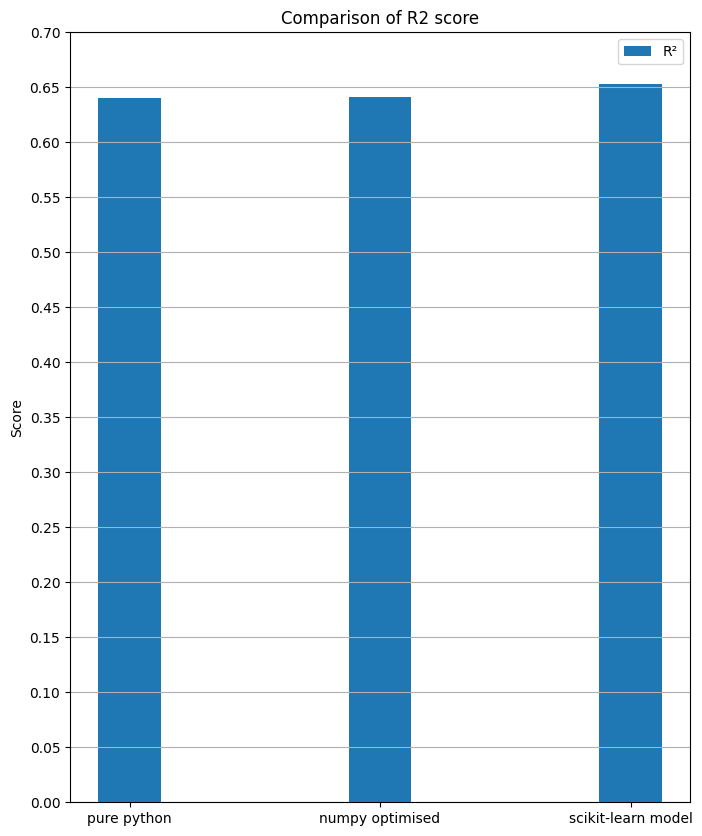

In [15]:
import matplotlib.pyplot as plt
import numpy as np
r2=[ 0.6405,0.6415,0.6526]
models=['pure python','numpy optimised','scikit-learn model']
x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(8, 10))
plt.bar(x, r2, width, label='R²')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparison of R2 score")
plt.legend()
plt.savefig('Comparison1.png')
plt.grid(axis='y')
plt.yticks(np.arange(0, 0.75, 0.05))
plt.show()

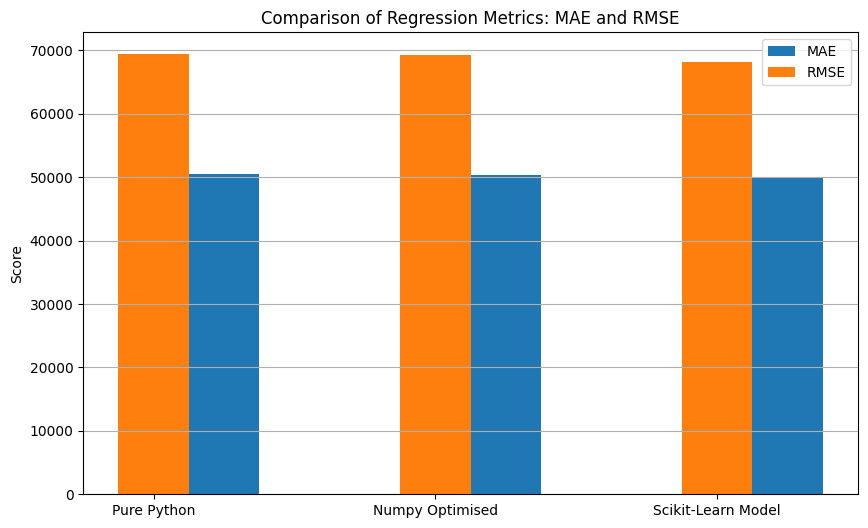

In [16]:
import matplotlib.pyplot as plt
import numpy as np
mae=[50519.6950,50390.6575,49964.0128]
rmse=[69375.6927,69279.9713,68201.5212]
models=['Pure Python','Numpy Optimised','Scikit-Learn Model']
x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(10, 6))
plt.bar(x+width, mae, width, label='MAE')
plt.bar(x, rmse, width, label='RMSE')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparison of Regression Metrics: MAE and RMSE")
plt.legend()
plt.savefig('Comparison.png')
plt.grid(axis='y')
plt.show()